In [1]:
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=UserWarning)

In [2]:
import pandas as pd
import numpy as np
import re

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Window의 한글 폰트 설정
plt.rc('font', family='Malgun Gothic')

## 상가업소정보 2019년 6월

In [5]:
# 데이터 불러오기
shop_2019 = pd.read_csv('../data/commercial_store/소상공인시장진흥공단_상가업소정보_201906_01.csv')
shop_2019.tail()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
565011,16284103,서동수타짬뽕,NaN,Q,음식,Q02,중식,Q02A00,중국음식/중국집,I56112,...,2641011000102180001013127,NaN,부산광역시 금정구 서동중심로 14,609831,46328.0,NaN,NaN,NaN,129.104354,35.210961
565012,16282701,주방,NaN,Q,음식,Q02,중식,Q02A00,중국음식/중국집,I56112,...,1144012300100570138013520,NaN,서울특별시 마포구 월드컵로19길 42,121820,4012.0,NaN,2,NaN,126.907641,37.555677
565013,16283091,원클래스독서실,NaN,R,학문/교육,R10,도서관/독서실,R10A01,독서실,R90212,...,2626010800112480004011513,월드메디컬타워,부산광역시 동래구 아시아드대로 239-1,607841,47851.0,NaN,2,202,129.067468,35.205469
565014,16287899,에스에스엠,NaN,D,소매,D12,가전제품소매,D12A05,전화기판매,G47312,...,2638010300105220024033909,선경아트빌,부산광역시 사하구 낙동남로1367번길 16,604853,49314.0,NaN,NaN,101,128.961386,35.107213
565015,16286754,천사통신,NaN,D,소매,D12,가전제품소매,D12A05,전화기판매,G47312,...,2614011800100170005012010,NaN,부산광역시 서구 구덕로124번길 27,602055,49246.0,NaN,NaN,NaN,129.022555,35.097951


In [28]:
coffee = shop_2019[shop_2019['상권업종중분류명'].str.contains('커피점/카페')]

In [29]:
coffee['상호명'].unique().shape

(15508,)

In [30]:
coffee['상호명'].value_counts()

간단하지만특별한화피디Cafe    1482
이디야커피               538
스타벅스                370
투썸플레이스              165
커피빈                 153
엔제리너스               134
할리스커피               124
카페베네                110
탐앤탐스                109
커피베이                104
공차                  102
쥬씨                  101
빽다방                  92
커피에반하다               76
요거프레소                69
파스쿠찌                 69
커피나무                 58
토프레소                 56
쥬스식스                 53
컴포즈커피                52
커피하우스                46
커피마마                 45
더카페                  45
더벤티                  43
메가커피                 42
설빙                   39
스무디킹                 35
할리스                  35
오가다                  33
셀렉토커피                33
                   ... 
리버파크커피숍               1
비타민청춘카페               1
언덕위에카파                1
프롬하츠커피하왕십리점           1
우드사이드커피랩              1
바리스타마르코디아티스티          1
방떡카페                  1
카페고릴라                 1
쥬씨삼성중앙역점              1
빈프로젝트                 1
영수야놀자COFFEE     

In [31]:
coffee[coffee['상호명']=='간단하지만특별한화피디Cafe']

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
7789,22729790,간단하지만특별한화피디Cafe,에델리아하이마트점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,1168010600105090000027515,하이마트사옥,서울특별시 강남구 삼성로 156,135280,6288.0,NaN,1,NaN,127.063815,37.494233
13663,20012278,간단하지만특별한화피디Cafe,카그뮤지컬예당점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,1165010800114640022021146,호경빌딩,서울특별시 서초구 남부순환로 2395,137070,6711.0,NaN,NaN,NaN,127.012347,37.480667
15550,20659435,간단하지만특별한화피디Cafe,드마린논현점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,1168010800102210017008042,엘크루빌딩,서울특별시 강남구 논현로 636,135010,6107.0,NaN,1,NaN,127.032971,37.510465
26169,22698069,간단하지만특별한화피디Cafe,루이스신사점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,1168010800100040021006003,NaN,서울특별시 강남구 논현로149길 62,135010,6039.0,NaN,1,NaN,127.023566,37.516974
43549,20833165,간단하지만특별한화피디Cafe,셀렉토스타점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,1129013900103490001000001,장위뉴타워,서울특별시 성북구 화랑로 248,136820,2787.0,NaN,NaN,NaN,127.056891,37.610395
46554,20561131,간단하지만특별한화피디Cafe,그랑KT부산정보통신센터점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,2617010400108300029014046,KT부산정보통신센터,부산광역시 동구 자성공원로 23,601706,48745.0,NaN,2,NaN,129.062479,35.137738
46827,3182203,간단하지만특별한화피디Cafe,모아가산점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,1154510100100600073015862,벽산디지털밸리5차,서울특별시 금천구 벚꽃로 244,153788,8513.0,NaN,NaN,108,126.885794,37.476748
53037,23428519,간단하지만특별한화피디Cafe,H무역점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,1168010500101590007016829,무역센터현대백화점,서울특별시 강남구 테헤란로 517,135730,6164.0,NaN,NaN,NaN,127.059745,37.508608
65282,23253872,간단하지만특별한화피디Cafe,마마스미니현대압구정점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,1168011000104290000005000,현대백화점본점,서울특별시 강남구 압구정로 165,135724,6001.0,NaN,NaN,NaN,127.027447,37.527359
65369,19979480,간단하지만특별한화피디Cafe,드구띠에역삼점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,1168010100108280007024608,한동빌딩사옥,서울특별시 강남구 테헤란로8길 37,135080,6239.0,NaN,1,NaN,127.032438,37.496557


In [34]:
coffee.loc[coffee['상호명'].str.contains('스타벅스')]

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
1219,19976038,스타벅스,이태원점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,1117013000101270029009542,NaN,서울특별시 용산구 이태원로 188,140200,4406.0,NaN,NaN,29,126.994781,37.534303
1946,19998811,스타벅스종로3가점,종로3가점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,1111015600100090003016323,NaN,서울특별시 종로구 종로 113-1,110123,3139.0,NaN,1,NaN,126.990207,37.570585
2840,20680373,스타벅스,신사2점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,1165010600100280001019301,푸른빌딩,서울특별시 서초구 강남대로 581,137904,6530.0,NaN,2,NaN,127.019763,37.513663
14939,20283351,스타벅스커피여의도IFC1F,NaN,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,1156011000100230000000001,서울국제금융센터,서울특별시 영등포구 국제금융로 10,150945,7326.0,NaN,3,NaN,126.924863,37.525172
14951,20288646,스타벅스,삼성역점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,1168010500101680026016641,제일빌딩,서울특별시 강남구 테헤란로103길 9,135090,6173.0,NaN,1,NaN,127.063878,37.510038
16354,20597950,스타벅스,신림포도몰점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,1162010200116410002000002,포도몰,서울특별시 관악구 신림로 330,151930,8777.0,NaN,1,NaN,126.930216,37.483845
16851,20825451,스타벅스신림사거리점,신림사거리점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,1162010200114220037013287,영일빌딩,서울특별시 관악구 남부순환로 1619,151890,8754.0,NaN,2,NaN,126.930487,37.484631
25513,22519435,스타벅스,NaN,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,1174010900104540060011660,NaN,서울특별시 강동구 천호대로157길 19,134020,5329.0,NaN,NaN,NaN,127.127021,37.538788
28762,23242282,스타벅스커피홍대역,NaN,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,1144012100101590001011730,상진빌딩,서울특별시 마포구 양화로 165,121756,3995.0,NaN,1,NaN,126.923599,37.557202
38122,25467314,스타벅스,신사역점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,1168010800100010003000001,NaN,서울특별시 강남구 도산대로 108,135010,6038.0,NaN,1,NaN,127.020635,37.516184


In [35]:
coffee['시도명'].value_counts()

서울특별시    18651
부산광역시     4862
Name: 시도명, dtype: int64

In [36]:
coffee['상권업종중분류명'].value_counts()

커피점/카페    23513
Name: 상권업종중분류명, dtype: int64

In [38]:
# 데이터프레임 새로 생성
df_seoul = shop_2019.loc[shop_2019['시도명'].str.startswith('서울')].copy()
df_seoul.shape

(401071, 39)

In [39]:
df_seoul.isnull().sum()

상가업소번호            0
상호명               0
지점명          344270
상권업종대분류코드         0
상권업종대분류명          0
상권업종중분류코드         0
상권업종중분류명          0
상권업종소분류코드         0
상권업종소분류명          0
표준산업분류코드      23587
표준산업분류명       23587
시도코드              0
시도명               0
시군구코드             0
시군구명              0
행정동코드             0
행정동명              0
법정동코드             0
법정동명              0
지번코드              0
대지구분코드            0
대지구분명             0
지번본번지             0
지번부번지         75924
지번주소              0
도로명코드             0
도로명               0
건물본번지             0
건물부번지        354031
건물관리번호            0
건물명          205736
도로명주소             0
구우편번호             0
신우편번호             2
동정보          369770
층정보          125634
호정보          343797
경도                0
위도                0
dtype: int64

In [44]:
# 전체? ()
# 문자열에 대해 (include=np.object)
# 숫자에 대해 (include=np.number)

df_seoul.describe(include=np.object)

,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,표준산업분류명,...,법정동명,대지구분명,지번주소,도로명,건물관리번호,건물명,도로명주소,동정보,층정보,호정보
count,401071,56801,401071,401071,401071,401071,401071,401071,377484,377484,...,401071,401071,401071,401071,401071,195335,401071,31301,275437,57274
unique,274470,20473,9,9,94,94,696,696,211,211,...,465,2,127572,11941,128106,26219,127287,975,139,2680
top,점프셈교실,강남점,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,I56111,한식 음식점업,...,역삼동,대지,서울특별시 종로구 종로6가 262-1,서울특별시 서초구 신반포로,1111016400102700003012054,동대문종합시장,서울특별시 종로구 종로 266,1,1,1
freq,1743,494,131687,131687,41243,41243,27110,27110,50833,50833,...,11866,400708,978,3531,1010,1020,997,5457,178422,6479


In [45]:
df_seoul[['위도', '경도']].describe(include=np.number)

,위도,경도
count,401071.000000,401071.000000
mean,37.544965,126.996983
std,0.048108,0.080574
min,37.434081,126.768169
25%,37.505431,126.928061
50%,37.541162,127.012732
75%,37.571921,127.057331
max,37.692398,127.182588


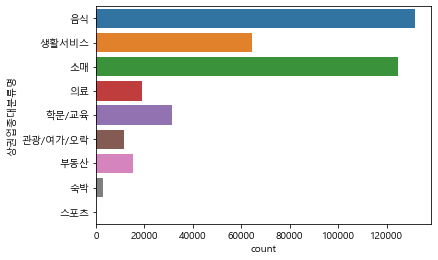

In [46]:
# 건수를 한 눈에 볼 때 막대그래프가 용이

sns.countplot(data=df_seoul, y='상권업종대분류명')

In [47]:
df_food = df_seoul.loc[df_seoul['상권업종대분류명'].str.contains('음식')]
df_food.shape

(131687, 39)

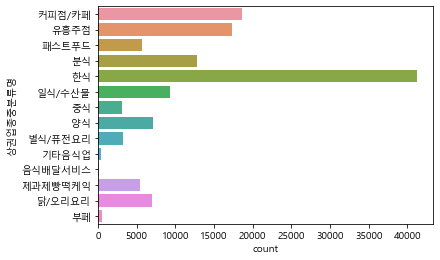

In [48]:
sns.countplot(data=df_food, y='상권업종중분류명')

## QUIZ

- 상권업종중분류명이 패스트푸드인 데이터프레임 df_fast_food 정의
- 상권업종중분류명이 패스트푸드인 데이터프레임의 상호명은 모두 몇개인가?
- 상권업종중분류명이 패스트푸드인 데이터프레임에서 가장 많은 상호명은?
- 서울에 있는 피자가 포함된 상호명 목록 출력
- 서울 강남구에 있는 도미노피자의 지점명을 모두 출력

In [49]:
# 1
df_fast_food = df_food.loc[df_food['상권업종중분류명'].str.contains('패스트푸드')]
df_fast_food.shape

(5683, 39)

In [56]:
# 2
len(df_fast_food['상호명'].unique())

3213

In [58]:
# 3
# df_fast_food['상호명'].value_counts()

In [82]:
# 4
df_pizza = df_seoul.loc[df_seoul['상호명'].str.contains('피자')]
df_pizza['상호명'].unique()
# df_pizza.shape

array(['피자마루', '솔로몬피자', '시장피자', '피자', '59피자', '도미노피자오금점', '피자스쿨', '피자에땅',
       '명품피자치킨', '피자헛', '도미노피자이문점', '피자클럽킴스', '피자스쿨장승배기', '도미노피자',
       '대장장이화덕피자', '피자글릭', '피자스쿨망우우림시장점', '카니발피자', '아이피자', '미스터피자신림녹두점',
       '빨간모자피자가좌점', '피자알볼로오류점', '미스터피자', '토니피자치킨족발', '빈스피자', '이태리피자',
       '빅마켓피자코트', '피자포유', '피자26', '디에이피자', '피자스쿨신월1호점', '피자굿망우우림점',
       '피자일마지오', '빨간고추피자', '피자알볼로옥수점', '코스트피자', '피자헛홍대본점', '밀라노피자',
       '모이또피자', '피자와김밥천국', '한국피자헛한티역', '제임스시카고피자', '영구스피자', '7번가피자',
       '한명숙피자펍', '피자샵', '빨간모자피자', '피자데이치킨데이', '조아피자', '왕서방피자', '피니치니피자',
       '수드피자', '우리집피자,돈치킨', '폴피자', '피자헤븐', '임실치즈피자', '피자스쿨본사', '피자세계',
       '피자나라치킨공주', '뽕뜨락피자', '명품임실치즈피자', '뽕뜨락피자점구로1점', '피자토비', '피자헛약수점',
       '리버티스피자', '명품임실피자', '피자스쿨송파1호점', '피자스쿨풍납점', '피자알볼로', '피자바람',
       '피자일일구', '나폴리피자치킨', '수피자', '준피자앤즉석떡볶이', '피자와치킨의러브레터', '피자몰',
       '조선피자', '피자애', '한스피자', '강정구의피자생각', '피자스쿨당산점', '계동피자',
       '이랜드크루즈피자몰노들', '논스톱피자치킨', '피자투어', '빨간모자피자명일점', '피자굼터',
       '강정구의피자생각광진점', '피자토랑', '피자헛중계

In [112]:
# 5 서울 강남구에 있는 도미노피자의 지점명을 모두 출력
df_gangnam_domino = df_seoul.loc[(df_seoul['상호명'].str.contains('도미노')) & (df_seoul['시군구명'].str.contains('강남구'))]
df_gangnam_domino['상호명'].value_counts()

도미노피자       6
도미노피자역삼점    1
도미노피자개포점    1
Name: 상호명, dtype: int64

# 배스킨라빈스와 던킨도너츠 입지분석

In [81]:
df_31 = df_seoul.loc[df_seoul['상호명'].str.contains('배스킨|베스킨|던킨')].copy()
df_31.shape

(651, 39)

In [84]:
df_31 = df_31[['상호명', '지점명', '상권업종대분류명', '상권업종중분류명',
              '지번주소', '도로명주소', '위도', '경도', '시군구명', '행정동명']].copy()
df_31.shape

(651, 10)

In [85]:
df_31.head()

,상호명,지점명,상권업종대분류명,상권업종중분류명,지번주소,도로명주소,위도,경도,시군구명,행정동명
110,배스킨라빈스,관악구청점,음식,패스트푸드,서울특별시 관악구 봉천동 863-13,서울특별시 관악구 관악로 161,37.479599,126.952166,관악구,청룡동
1098,던킨도너츠,이대1호점,음식,패스트푸드,서울특별시 서대문구 대현동 33-13,서울특별시 서대문구 이화여대길 56,37.559263,126.945369,서대문구,신촌동
1838,던킨도너츠테크노마트점,테크노마트점,음식,패스트푸드,서울특별시 광진구 구의동 546-4,서울특별시 광진구 광나루로56길 85,37.535713,127.095681,광진구,구의3동
2145,베스킨라빈스,NaN,음식,패스트푸드,서울특별시 마포구 서교동 360-5,서울특별시 마포구 와우산로 88,37.552104,126.923809,마포구,서교동
2281,던킨도너츠창동하나로,NaN,음식,패스트푸드,서울특별시 도봉구 창동 1-10,서울특별시 도봉구 마들로11길 20,37.655101,127.050818,도봉구,창4동


In [91]:
# 브랜드명이라는 새로운 컬럼 생성
df_31['브랜드명'] = ''

In [92]:
df_31[['상호명', '브랜드명']].head()

,상호명,브랜드명
110,배스킨라빈스,
1098,던킨도너츠,
1838,던킨도너츠테크노마트점,
2145,베스킨라빈스,
2281,던킨도너츠창동하나로,


In [93]:
df_31.loc[df_31['상호명'].str.contains('배스킨|베스킨'), '브랜드명'] = '배스킨라빈스'
df_31.loc[df_31['상호명'].str.contains('던킨'), '브랜드명'] = '던킨도너츠'

In [94]:
df_31[['상호명', '브랜드명']].head()

,상호명,브랜드명
110,배스킨라빈스,배스킨라빈스
1098,던킨도너츠,던킨도너츠
1838,던킨도너츠테크노마트점,던킨도너츠
2145,베스킨라빈스,배스킨라빈스
2281,던킨도너츠창동하나로,던킨도너츠


In [95]:
df_31_group_count = df_31['브랜드명'].value_counts()
df_31_group_count

배스킨라빈스    462
던킨도너츠     189
Name: 브랜드명, dtype: int64

In [99]:
df_31_ratio = df_31_group_count[0]/df_31_group_count[1]
print('제공된 데이터로 봤을 때 서울에는 던킨도너츠보다 배스킨라빈스의 매장이 {0:.2f}배가량 많습니다.'.format(df_31_ratio))

제공된 데이터로 봤을 때 서울에는 던킨도너츠보다 배스킨라빈스의 매장이 2.44배가량 많습니다.


In [100]:
df_31.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 651 entries, 110 to 558398
Data columns (total 11 columns):
상호명         651 non-null object
지점명         496 non-null object
상권업종대분류명    651 non-null object
상권업종중분류명    651 non-null object
지번주소        651 non-null object
도로명주소       651 non-null object
위도          651 non-null float64
경도          651 non-null float64
시군구명        651 non-null object
행정동명        651 non-null object
브랜드명        651 non-null object
dtypes: float64(2), object(9)
memory usage: 61.0+ KB


In [101]:
# 형변환
df_31['위도'] = df_31['위도'].astype(float)
df_31['경도'] = df_31['경도'].astype(float)

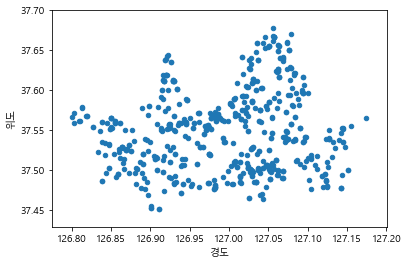

In [102]:
# Pandas로 scatter plot 그리기
df_31.plot.scatter(x='경도', y='위도')

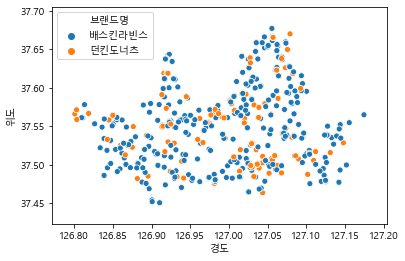

In [103]:
sns.scatterplot(data=df_31, x='경도', y='위도', hue='브랜드명')

In [104]:
# Marker로 표시하기

import folium

geo_df = df_31.copy()


map = folium.Map(location=[geo_df['위도'].mean(), geo_df['경도'].mean()],
                 zoom_start=12)
    
for n in geo_df.index:
#     팝업에 들어갈 텍스트 지정
    popup_name = geo_df.loc[n, '브랜드명'] + ' - ' + geo_df.loc[n, '도로명주소']
    
#     브랜드명에 따라 아이콘 색상을 달리해서 표시
    if geo_df['브랜드명'][n] == '던킨도너츠':
        icon_color = 'pink'
    else:
        icon_color='blue'
    
#     Marker 기본 정의
#     개수가 적을때 분석이 용이함
    folium.Marker([geo_df.loc[n, '위도'],
                   geo_df.loc[n, '경도']],
                  popup = popup_name,
                 icon=folium.Icon(color=icon_color)).add_to(map)

map

In [108]:
# CircleMarker로 표시하기

map = folium.Map(location=[geo_df['위도'].mean(), geo_df['경도'].mean()],
                 zoom_start=12, tiles = 'Stamen Toner')
    
for n in geo_df.index:
#     팝업에 들어갈 텍스트 지정
#     loc사용하는 것이 더 빠르다
    popup_name = geo_df.loc[n, '브랜드명'] + ' - ' + geo_df.loc[n, '도로명주소']
    
#     브랜드명에 따라 아이콘 색상을 다르게 하기
    if geo_df['브랜드명'][n] == '던킨도너츠':
        icon_color = 'red'
    else:
        icon_color='blue'
    
#     CircleMarker 정의하기
    folium.CircleMarker([geo_df.loc[n, '위도'], geo_df.loc[n, '경도']],
                        radius=3,
                        popup = popup_name,
                        color = icon_color,
                        fill = True,
                        fill_color = icon_color).add_to(map)

map

# 뚜레쥬르, 파리바게뜨 매장 위치 분석

In [116]:
df_bread = df_seoul.loc[df_seoul['상호명'].str.contains('뚜레쥬르|파리(바게|크라상)')
                      &
                      (~df_seoul['상호명'].str.contains('파스쿠찌|잠바주스'))].copy()

# 파스쿠찌 상호명에 파리크라상이 들어가기 때문에 파스쿠찌 제거
df_bread.shape

(811, 39)

In [118]:
df_bread = df_bread[['상호명', '지점명', '상권업종대분류명', '상권업종중분류명',
              '지번주소', '도로명주소', '위도', '경도', '시군구명', '행정동명']].copy()
df_bread.head()

,상호명,지점명,상권업종대분류명,상권업종중분류명,지번주소,도로명주소,위도,경도,시군구명,행정동명
2879,뚜레쥬르,공릉점,음식,제과제빵떡케익,서울특별시 노원구 공릉동 745,서울특별시 노원구 공릉로 213,37.628289,127.077295,노원구,공릉2동
13678,뚜레쥬르중계브라운,NaN,음식,제과제빵떡케익,서울특별시 노원구 중계동 506,서울특별시 노원구 동일로203가길 29,37.639918,127.064245,노원구,중계2.3동
13684,파리바게뜨상계제일점,상계제일점,음식,제과제빵떡케익,서울특별시 노원구 상계동 670-2,서울특별시 노원구 노원로 540,37.661367,127.059227,노원구,상계10동
13838,파리바게뜨길동사거리점,길동사거리점,음식,제과제빵떡케익,서울특별시 강동구 성내동 378,서울특별시 강동구 천호대로 1128,37.534154,127.136501,강동구,성내3동
14225,뚜레쥬르,GT타워점,음식,제과제빵떡케익,서울특별시 서초구 서초동 1317-23,서울특별시 서초구 서초대로 411,37.498098,127.025904,서초구,서초4동


In [120]:
df_bread['브랜드명'] = ''
df_bread[['상호명', '브랜드명']].head()

,상호명,브랜드명
2879,뚜레쥬르,
13678,뚜레쥬르중계브라운,
13684,파리바게뜨상계제일점,
13838,파리바게뜨길동사거리점,
14225,뚜레쥬르,


In [129]:
df_bread.loc[df_bread['상호명'].str.contains('뚜레(쥬|주)르'), '브랜드명'] = '뚜레쥬르'
df_bread.loc[df_bread['상호명'].str.contains('파리(바게|크라)'), '브랜드명'] = '파리바게뜨'

df_bread[['상호명', '브랜드명']].head()

,상호명,브랜드명
2879,뚜레쥬르,뚜레쥬르
13678,뚜레쥬르중계브라운,뚜레쥬르
13684,파리바게뜨상계제일점,파리바게뜨
13838,파리바게뜨길동사거리점,파리바게뜨
14225,뚜레쥬르,뚜레쥬르


In [130]:
df_bread['브랜드명'].value_counts()

파리바게뜨    554
뚜레쥬르     257
Name: 브랜드명, dtype: int64

In [131]:
geo_df = df_bread.copy()

map = folium.Map(location=[geo_df['위도'].mean(), geo_df['경도'].mean()],
                 zoom_start=12, tiles = 'Stamen Toner')
    
for n in geo_df.index:
    popup_name = geo_df.loc[n, '브랜드명'] + ' - ' + geo_df.loc[n, '도로명주소']
    
#     브랜드명에 따라 아이콘 색상을 다르게 하기
    if geo_df['브랜드명'][n] == '뚜레쥬르':
        icon_color = 'green'
    else:
        icon_color='blue'
    
#     CircleMarker 정의하기
    folium.CircleMarker([geo_df.loc[n, '위도'], geo_df.loc[n, '경도']],
                        radius=3,
                        popup = popup_name,
                        color = icon_color,
                        fill = True,
                        fill_color = icon_color).add_to(map)

map

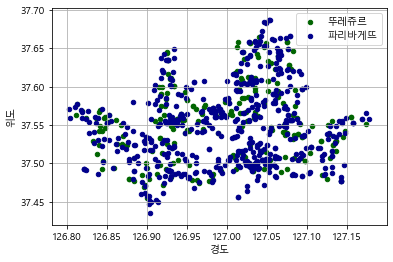

In [135]:
# pandas로 그리기
df_tou = df_bread[df_bread['브랜드명'] == '뚜레쥬르']
df_paris = df_bread[df_bread['브랜드명'] == '파리바게뜨']


ax = df_tou[['경도', '위도', '브랜드명']].plot.scatter(x='경도', y='위도', color='DarkGreen', label = '뚜레쥬르')

df_paris[['경도', '위도', '브랜드명']].plot.scatter(x='경도', y='위도', color='DarkBlue', label = '파리바게뜨', ax=ax, grid=True)

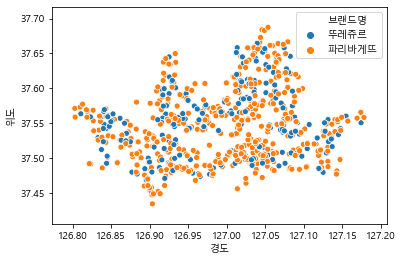

In [136]:
# seaborn으로 그리기
sns.scatterplot(data=df_bread, x='경도', y='위도', hue='브랜드명')